In [31]:
from fastai.vision.all import ImageBlock, CategoryBlock, get_image_files, parent_label, Resize,aug_transforms, vision_learner, resnet34, error_rate, Interpretation, ClassificationInterpretation
from fastai.data.block import DataBlock, RandomSplitter

In [32]:
images = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(),
    get_y = parent_label,
    item_tfms=Resize(256),
    batch_tfms=aug_transforms(size=256, flip_vert=True, max_rotate=180, max_zoom=1.5, min_zoom=0.9))

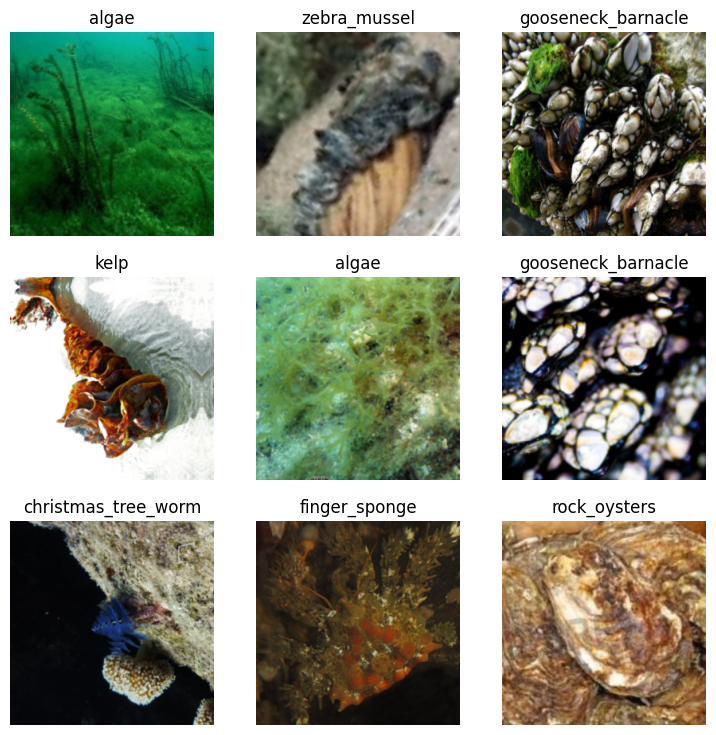

In [33]:
dls = images.dataloaders("images")
dls.show_batch(max_n = 9)

In [34]:
learner = vision_learner(dls,resnet34, metrics=error_rate)

SuggestedLRs(valley=0.0010000000474974513)

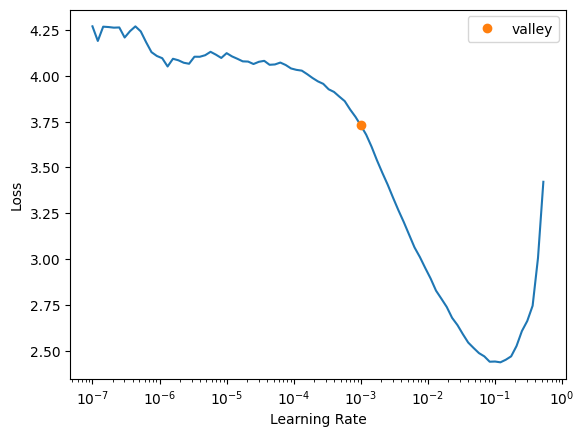

In [35]:
learner.lr_find()

In [36]:
learner.fine_tune(10,3e-3)

epoch     train_loss  valid_loss  error_rate  time    
0         2.696711    0.660103    0.182510    02:25                                      
epoch     train_loss  valid_loss  error_rate  time    
0         0.912968    0.491416    0.152091    02:50                                       
1         0.726626    0.475992    0.144487    02:52                                       
2         0.611096    0.424911    0.133080    02:51                                       
3         0.525015    0.383430    0.125475    03:05                                       
4         0.449692    0.342886    0.091255    02:51                                       
5         0.383335    0.437180    0.136882    02:50                                       
6         0.318857    0.390868    0.091255    02:50                                       
7         0.264821    0.340966    0.098859    02:51                                       
8         0.230841    0.347757    0.095057    02:51                     

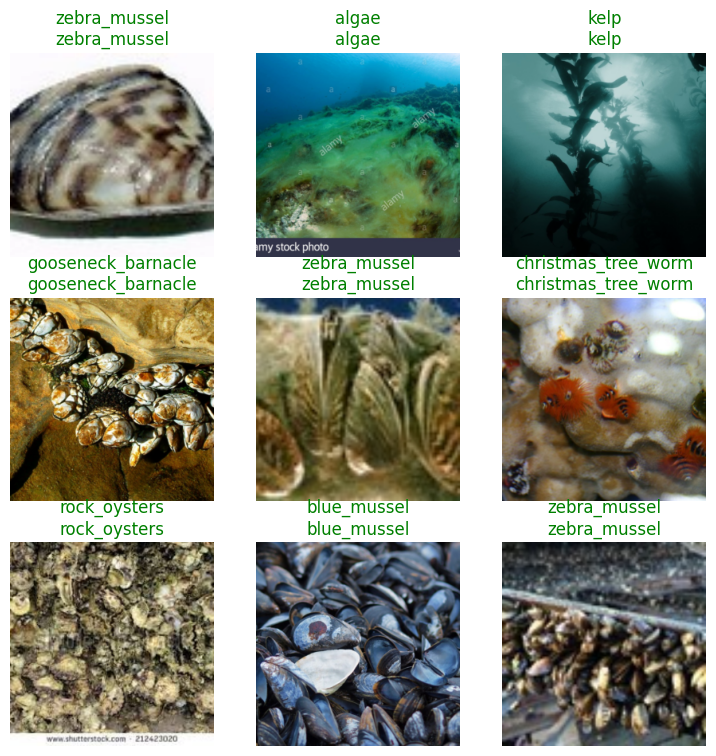

In [37]:
learner.show_results()

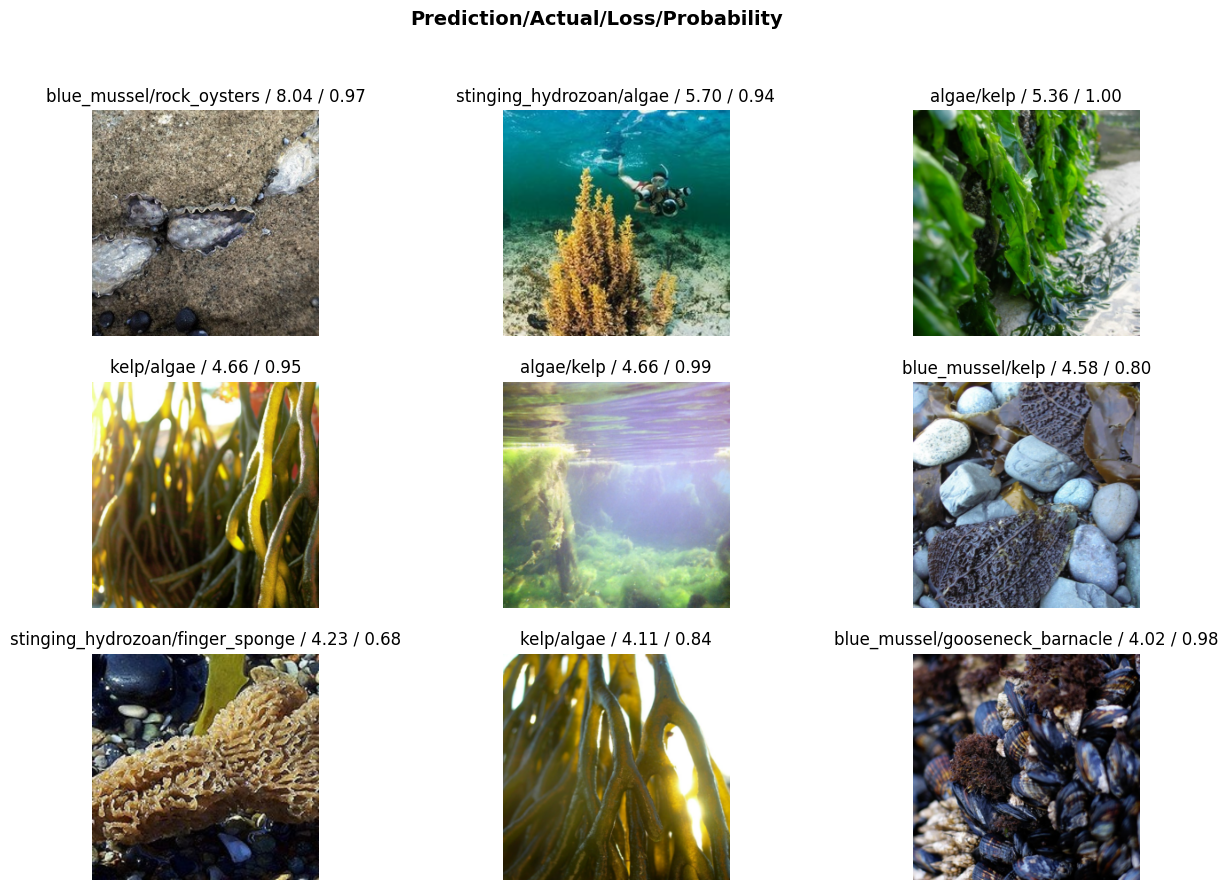

In [38]:
interpreter = Interpretation.from_learner(learner)
interpreter.plot_top_losses(9, figsize=(15,10))

In [39]:
classification = ClassificationInterpretation.from_learner(learner)

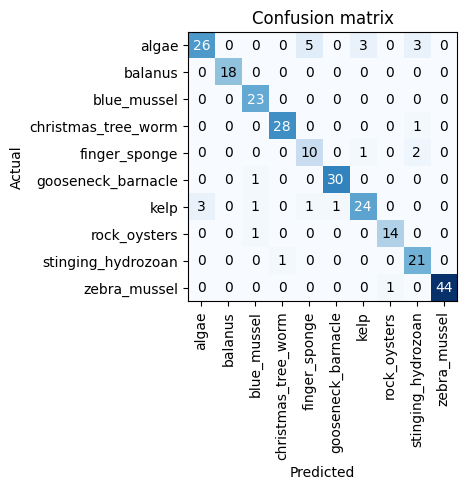

In [40]:
classification.plot_confusion_matrix()

In [41]:
learner.save("model_no_opt.pth", with_opt=False)
learner.save("model_with_opt.pth", with_opt=True)

Path('models/model_with_opt.pth.pth')

In [1]:
learner.eval()
learner.save("model", with_opt=False)

NameError: name 'learner' is not defined

In [42]:
learner.export("syltagurk")

In [43]:
print(learner.model)

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  